In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=20)
import timeit # библиотека для замеров времени

In [2]:
class ExplicitEuler:
    
    def __init__(self, f, u0, numBlocks, tStart, tEnd):
        
        self.f = f
        self.u0 = u0
       
        self.numBlocks, self.numPoints = numBlocks, numBlocks + 1
        self.dt = (float(tEnd) - float(tStart))/self.numBlocks
        
        self.solutionArray = np.zeros(self.numPoints)
        self.timeArray = np.linspace(tStart, tEnd, self.numPoints)
        
        self.tStart, self.tEnd = float(tStart), float(tEnd)
        
    
    def Solve(self):
        
      
        start = timeit.default_timer()
        
        # начальное условие
        self.solutionArray[0] = self.u0
        
        # шаги по времени
        for i in range(self.numBlocks):
            
            # для краткости
            uOld, dt, f = self.solutionArray[i], self.dt, self.f, 
                                
            # формула явного метода Эйлера 
            self.solutionArray[i + 1] = uOld + dt*f(uOld)
            
    def PlotSolution(self):
        
        plt.plot(self.timeArray, self.solutionArray, '-o')
        
        
       
       
            
    


In [3]:
class SolveViaHeun(ExplicitEuler):
    
       def Solve(self):
            
            start = timeit.default_timer()
        
        # начальное условие
            self.solutionArray[0] = self.u0
        
            
            # шаги по времени
            for i in range(self.numBlocks):
            
            # для краткости
                uOld, dt, f = self.solutionArray[i], self.dt, self.f
               
                uStar = self.solutionArray[i] + dt*f(self.solutionArray[i])  
            
                self.solutionArray[i + 1] = uOld + dt/2.*(f(uOld)+ f(uStar))   
            
            

    

In [4]:
class SolveViaRK4(SolveViaHeun):
    
       
        def Solve(self):
        
      
            start = timeit.default_timer()
        
        # начальное условие
            self.solutionArray[0] = self.u0
        
        # шаги по времени
            for i in range(self.numBlocks):
            
            # для краткости
                uOld, dt, f = self.solutionArray[i], self.dt, self.f, 
                    
                k1 = f(uOld)
                k2 = f(uOld + dt/2.*k1)
                k3 = f(uOld + dt/2.*k2)
                k4 = f(uOld + dt*k3)
            
                self.solutionArray[i + 1] = uOld + dt/6.*(k1 + 2.*k2 + 2.*k3 + k4)  
            

                                       
            
       
    

In [5]:
class Derivative:
    def __init__(self, function, step=1e-5):
        self._function = function
        self._step = step
    
    def __call__(self, x):
        f, h = self._function, self._step
        return 1./(2*h) * (f(x + h) - f(x - h))

In [6]:
class Trapezoidal(SolveViaRK4):
    
  
    
   
    def NextStep(self):
        u, f, i, t, dt = self._solutionArray, self._rightHandSideFunction, \
                     self._counter, self._timeArray, self._dt
        
        def NewtonMethodFunction(y):
             return y - dt/2.*f(y) - u[i] - dt/2.*f(u[i])
        
        NewtonMethodDerivative = Derivative(NewtonMethodFunction)
        uOld = u[i] + dt*f(u[i])
        NewtonCounter = 0
        self._nonlinearSolverTolerance = 1e-3 
        
        NewtonError = 1.
        while NewtonError > self._nonlinearSolverTolerance :
            uNew = uOld - NewtonMethodFunction(uOld)/NewtonMethodDerivative(uOld)
            NewtonCounter += 1
            
            NewtonError = np.fabs(uOld - uNew)
            uOld = uNew
            
            
       
        return uNew

In [7]:
class LogisticRightHandSide:
        
    def __init__(self, alpha, R):
        self._alpha = float(alpha)
        self._R = float(R)
    
    
    def __call__(self, u):
        return self._alpha*u*(1. - u/self._R)

In [8]:
rhs1 = LogisticRightHandSide(alpha=0.2, R=100.)

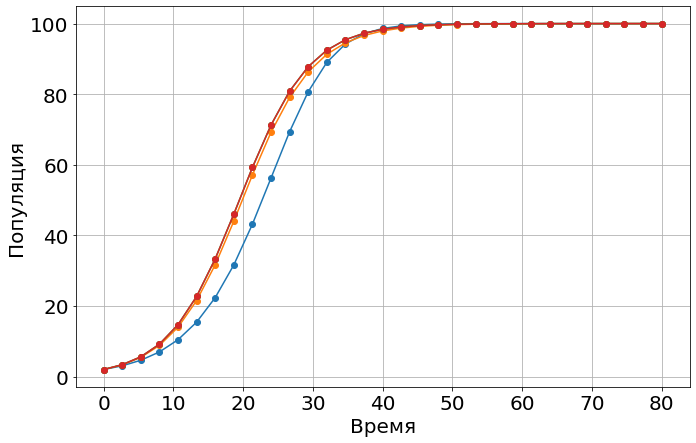

In [11]:
methodsClass = [ExplicitEuler, SolveViaHeun, SolveViaRK4, Trapezoidal]
plt.figure(figsize=(11,7))

 
# именнно такая реализация в HPL
for methodClass in methodsClass:
    # вызываем конструктор
    method = methodClass(f=rhs1, u0=2., numBlocks=30, tStart=0., tEnd=80.)

    
    method.Solve()
    method.PlotSolution()


plt.xlabel('Время')
plt.ylabel('Популяция')
plt.grid('off')
plt.show() 